# Getting Started With Robot Inverse Kinematics (IK)

Welcome to the first guide in the series of getting started with Dr.QP robot Inverse Kinematics (IK).
In this guide, we will cover the basics of IK and how to use it to control a robot.

## What is Inverse Kinematics?
Inverse Kinematics (IK) is a technique used in robotics to determine the joint angles required to achieve a desired end-effector position. It is the process of solving the inverse problem of forward kinematics, which calculates the end-effector position given the joint angles.

## Why is Inverse Kinematics Important?
Inverse Kinematics is important because it allows robots to perform complex movements and tasks. By calculating the joint angles required to reach a specific position, robots can navigate their environment and interact with objects more effectively.

## How to Use Inverse Kinematics
To use Inverse Kinematics, you need to have a model of your robot's kinematics. This model includes the lengths of the robot's links and the joint angles. Once you have this model, you can use it to calculate the joint angles required to achieve a desired end-effector position.

## Setting up the Jupyter notebook

Before we start, lets configure matplotlib to display plots inline:

In [13]:
%matplotlib inline


As well as enable live python modules reloading, so you can change the code in sibling files and see the results immediately without restarting the kernel

In [14]:
# Enable python modules live reloading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## The robot model

For this tutorial we will use the simplest part of Dr.QP robot - a single leg.

It has a 3 degrees of freedom and consists of 3 links: coxa, femur and tibia and 3 joints: alpha, beta and gamma.

In [15]:
from point import Point
import numpy as np

coxa_length = 3
femur_length = 4
tibia_length = 7

alpha = 0 # controls coxa angle, 0 is straight
beta = 0 # controls femur angle, 0 is straight
gamma = 0 # controls tibia angle, 0 is straight


def forward_kinematics(coxa_length, femur_length, tibia_length, alpha, beta, gamma):
    alpha_rad = np.radians(alpha)
    beta_rad = np.radians(beta) + alpha_rad
    gamma_rad = np.radians(gamma) + beta_rad


    start = Point(0, 0, f'{alpha=}°')
    coxa = start + Point(coxa_length, 0, f'{beta=}°').rotate(alpha_rad)
    femur = coxa + Point(femur_length, 0, f'{gamma=}°').rotate(beta_rad)
    tibia = femur + Point(tibia_length, 0, 'Foot').rotate(gamma_rad)

    return [start, coxa, femur, tibia]

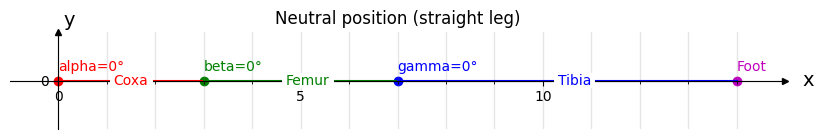

In [16]:
from plotting import plot_leg_links_at_angles


points = forward_kinematics(coxa_length, femur_length, tibia_length, alpha, beta, gamma)
plot_leg_links_at_angles(points, 'Neutral position (straight leg)')

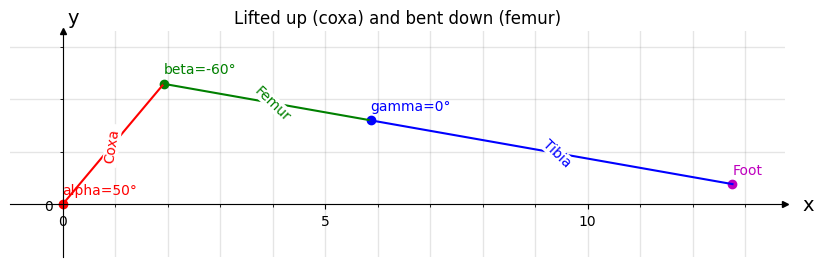

In [17]:

points = forward_kinematics(coxa_length, femur_length, tibia_length, 50, -60, 0)
plot_leg_links_at_angles(points, 'Lifted up (coxa) and bent down (femur)')


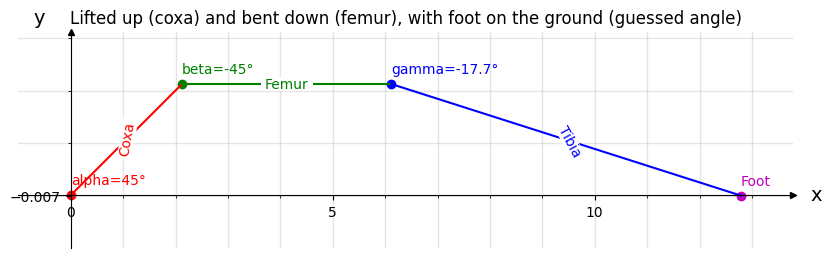

In [18]:
points = forward_kinematics(coxa_length, femur_length, tibia_length, 45, -45, -17.7)
plot_leg_links_at_angles(points, 'Lifted up (coxa) and bent down (femur), with foot on the ground (guessed angle)')